✅ Data Loaded. Shape: (394, 14)
Columns: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


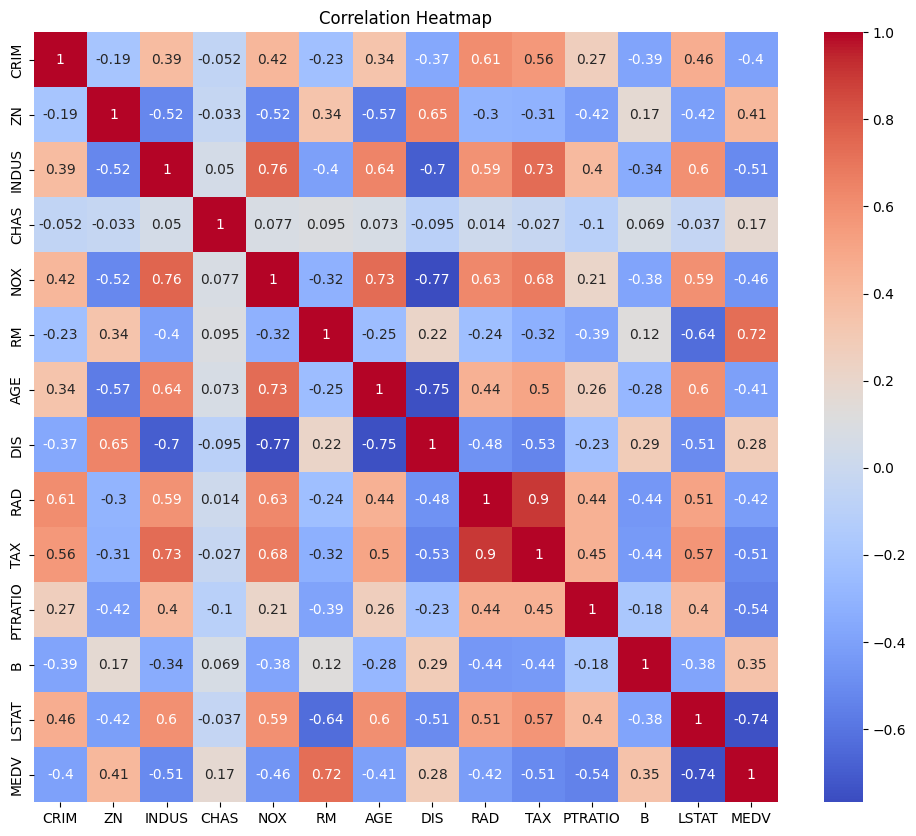

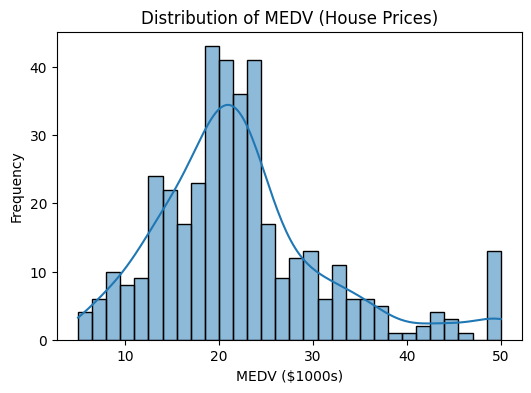

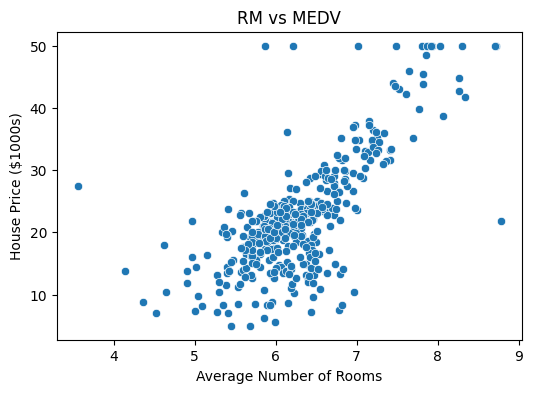

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 572.6992 - mae: 21.8796 - val_loss: 433.4412 - val_mae: 19.2746
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 459.1675 - mae: 19.2159 - val_loss: 266.6683 - val_mae: 14.5314
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 237.7086 - mae: 13.2754 - val_loss: 90.2840 - val_mae: 6.8368
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.3707 - mae: 6.6633 - val_loss: 47.0748 - val_mae: 4.5831
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.2355 - mae: 4.3039 - val_loss: 28.3099 - val_mae: 3.6337
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9826 - mae: 3.6182 - val_loss: 21.8237 - val_mae: 3.3142
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.1460 - mae: 3.2534 - val_loss: 18.0195 - val_mae: 3.0395
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.7089 - mae: 3.0243 - val_loss: 15.9492 - val_mae: 2.8847
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━

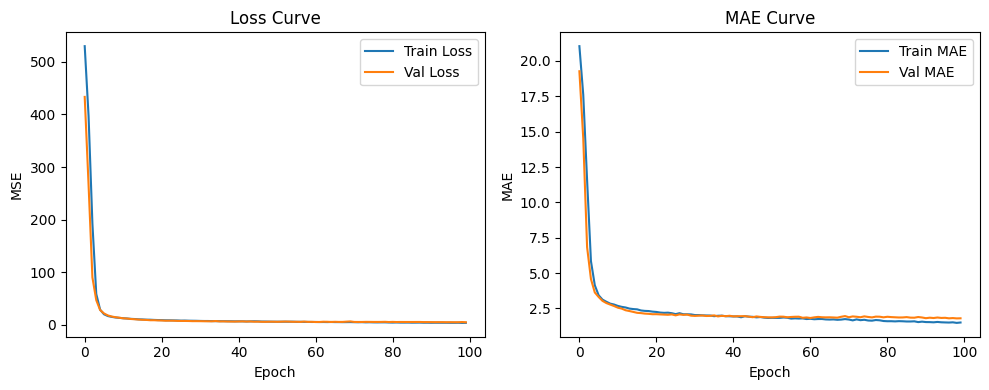

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


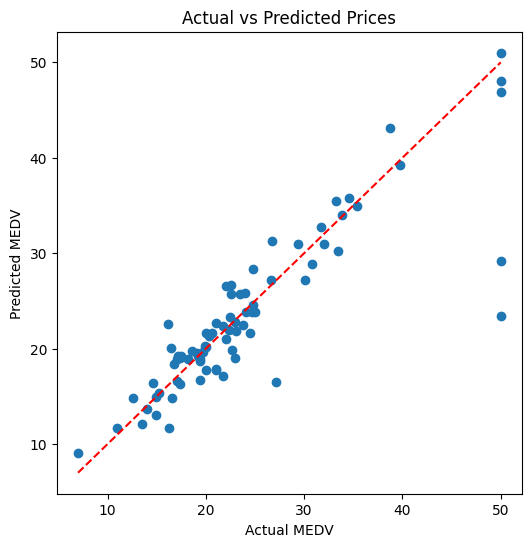

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("HousingData.csv")
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

print("✅ Data Loaded. Shape:", df.shape)
print("Columns:", df.columns)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Histogram of MEDV
plt.figure(figsize=(6, 4))
sns.histplot(df["MEDV"], bins=30, kde=True)
plt.title("Distribution of MEDV (House Prices)")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Frequency")
plt.show()

# Rooms vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["RM"], y=df["MEDV"])
plt.title("RM vs MEDV")
plt.xlabel("Average Number of Rooms")
plt.ylabel("House Price ($1000s)")
plt.show()

X = df.drop("MEDV", axis=1).values
y = df["MEDV"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=8,
    validation_split=0.1, verbose=1
)

loss, mae = model.evaluate(X_test, y_test)
print(f"\n📉 Test MAE: {mae:.2f}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("MAE Curve")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.tight_layout()
plt.show()

y_pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices")
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv("HousingData.csv")
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna()

In [22]:
df.shape

(394, 14)

In [23]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

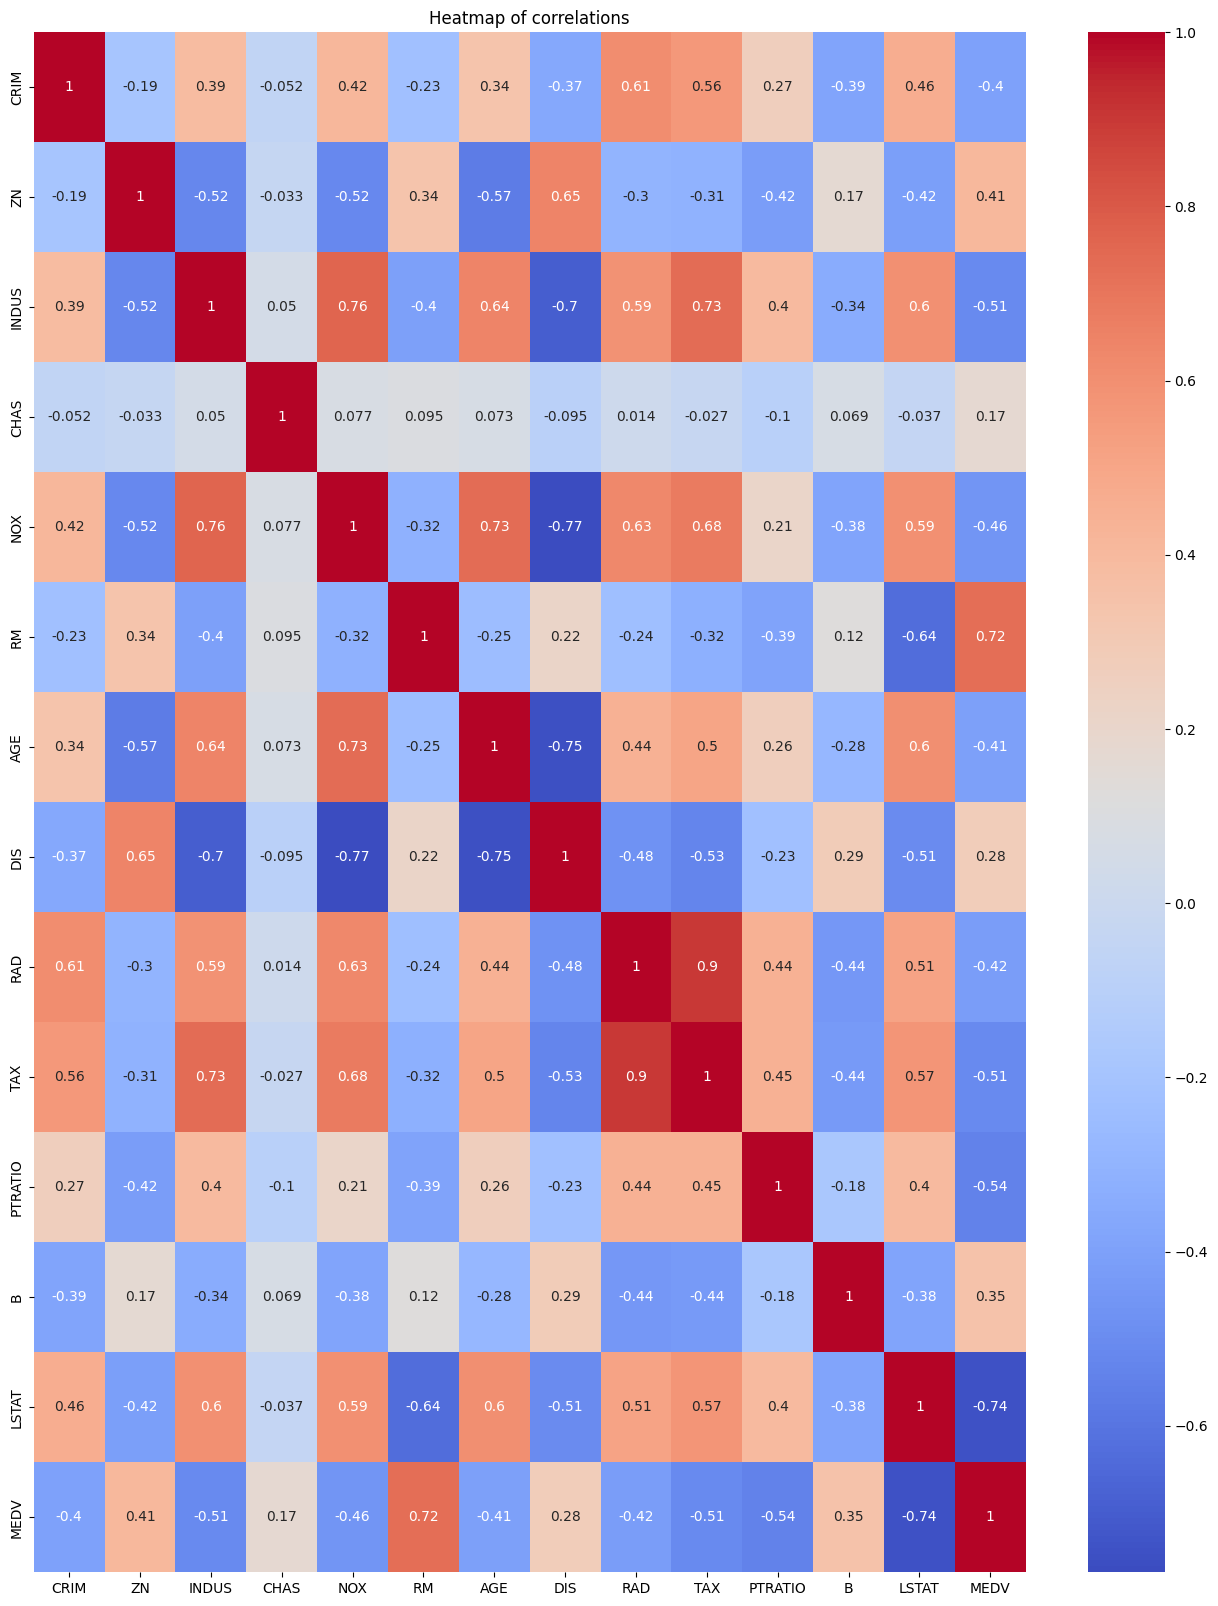

In [24]:
plt.figure(figsize=(16,20))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm")
plt.title("Heatmap of correlations")
plt.show()

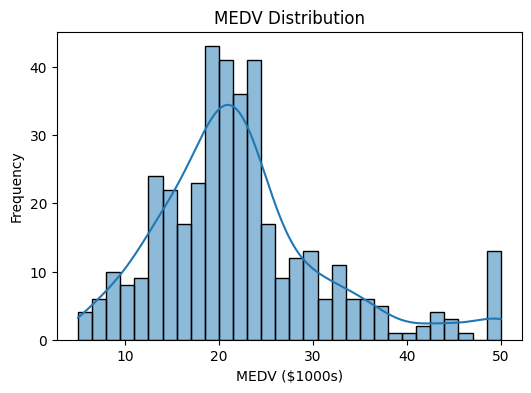

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df["MEDV"], bins=30, kde=True)
plt.title("MEDV Distribution")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Frequency")
plt.show()

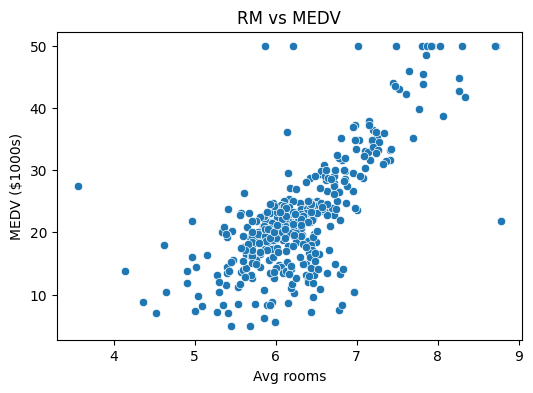

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["RM"], y=df["MEDV"])
plt.title("RM vs MEDV")
plt.xlabel("Avg rooms")
plt.ylabel("MEDV ($1000s)")
plt.show()

In [27]:
y = df["MEDV"].values
x = df.drop("MEDV", axis=1).values

In [28]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [30]:
model = Sequential([
    Dense(64, input_dim=x.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [32]:
history=model.fit(
    x_train, y_train,
    epochs=100, batch_size=8,
    validation_split=0.1, verbose=1
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 527.3276 - mse: 527.3276 - val_loss: 427.2469 - val_mse: 427.2469
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 425.3594 - mse: 425.3594 - val_loss: 263.6982 - val_mse: 263.6982
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 237.2753 - mse: 237.2753 - val_loss: 102.7427 - val_mse: 102.7427
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.1430 - mse: 69.1430 - val_loss: 55.3318 - val_mse: 55.3318
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.8906 - mse: 36.8906 - val_loss: 32.4449 - val_mse: 32.4449
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.6329 - mse: 26.6329 - val_loss: 23.8508 - val_mse: 23.8508
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.3540 - mse: 20.3540 - val_loss: 20.7133 - val_mse: 20.7133
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.8007 - mse: 19.8007 - val_loss: 18.1221 - val_mse: 18.1221
Epoch 9/100
36/36 ━

In [33]:
loss, mse = model.evaluate(x_test, y_test)
print('loss', loss)
print('mse', mse)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 24.5108 - mse: 24.5108 
loss 22.402488708496094
mse 22.402488708496094


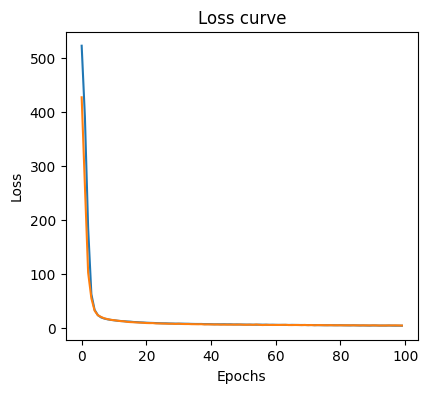

In [37]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

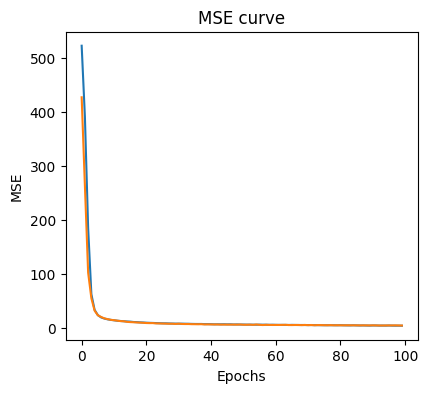

In [39]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(history.history['mse'], label="Training mse")
plt.plot(history.history['val_mse'], label="validation mse")
plt.title("MSE curve")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


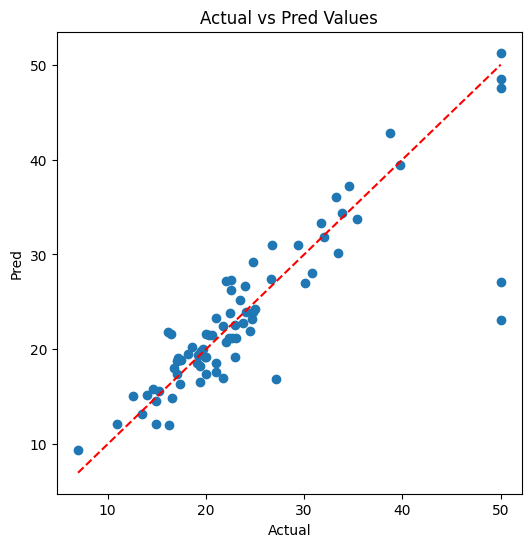

In [43]:
y_pred=model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test),max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title("Actual vs Pred Values")
plt.xlabel("Actual")
plt.ylabel("Pred")
plt.show()